<figure width=100%>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=70 ALIGN="right">
</figure> 
    
# Problem Set #6
## CSCI 3287 
<hr>
    
### Instructions / Notes:

**_Read these carefully_**

There are three problems in this assignment. 
   1. Double Buffering IO Costs is 40 points
   1. IO Cost for different Join Algorithms is 35 points
   1. Exploring the performance of Hash Join is 25 points. 
    
Each problem has a number of sub-problems which indicate their individual number of points.     
Although problem #1 is the most points, it's actually the easiest problem --     
-- but the solution of problem #2 depends on being careful and understanding problem #1 completely.

* **Please read all the points of the "Notes" sections- they're important for this PS!!!**
* You **are not required to do any plotting in this PS- only in certain problems to provide the tuples that would generate a plot.**  You can then optionally plot (in the notebook with matplotlib)
* You **may** create new IPython notebook cells to use for e.g. testing, debugging, exploring, etc.- this is encouraged in fact!- **just make sure that your final answer for each question is _in its own cell_ and _clearly indicated_**
* _Have fun!_

Problem 1: Double Buffereing (40 points)
------------------------
In this problem we'll explore an optimization often referred to as **_Double Buffering_**, which we'll use to speed up the **external merge sort algorithm** we saw in lecture.

Although we haven't explicitly modeled it in many of our calculations so far, recall that _sequential IO_ (i.e. involving reading from / writing to consecutive pages) is generally much faster that _random access IO_ (any reading / writing that is not sequential). Additionally, on newer memory technologies like SSD reading data can be faster than writing data (if you want to read more about SSD access patterns look [here](http://codecapsule.com/2014/02/12/coding-for-ssds-part-5-access-patterns-and-system-optimizations/). 

In other words, for example, if we read 4 consecutive pages from file **_A_**, this should be much faster than reading 1 page from **_A_**, then 1 page from file **_B_**, then the next page from **_A_**.

**In this problem, we will begin to model this, by**
* assuming that 3/4 sequential _READS_ are "free", i.e. the total cost of **_4_** sequential reads is **_1_** IO. 
* We will also assume that the writes are always twice as expensive as a read. Sequential writes are never free, therefore the cost of **_N_** writes is always **_2N_**.

### Other important notes:
* **NO REPACKING:** Consider the external merge sort algorithm using the basic optimizations we present in lecture, but do not use the repacking optimization covered in lecture.
* **ONE BUFFER PAGE RESERVED FOR OUTPUT:** Assume we use one page for output in a merge, e.g. a **_B_**-way merge would require **_B+1_** buffer pages
* **REMEMBER TO ROUND:** Take ceilings (i.e. rounding up to nearest integer values) into account in this problem for full credit!  Note that we have sometimes omitted these (for simplicity) in lecture. In Python, you can use `math.ceil()` to compute the ceiling (next largest integer).
* **Consider worst case cost:** In other words, if 2 reads _could happen_ to be sequential, but in general might not be, consider these random IO.

In [2]:
import math

### Q 1.1 [ 15 pts total ]

Consider a modification of the external merge sort algorithm where **reads are always read in 4-page chunks (i.e. 4 pages sequentially at a time)** so as to take advantage of sequential reads. Calculate the cost of performing the external merge sort for a setup having $B+1=20$ buffer pages and an unsorted input file with $160$ pages.

Show the steps of your work and make sure to explain your reasoning by writing them as python comments above the final answers.

#### Q 1.1.1 [ 3 pts ]

What is the **exact** IO cost of spliting and sorting the files? As is standard we want runs of size $B+1$.

In [4]:
N = 160
B = 19

In [5]:
### BEGIN SOLUTION
# To calculate the cost of splitting and sorting the files, we need to consider the reading and writing costs.
# Since we are reading in 4-page chunks, every 4 pages read cost 1 IO. However, because writing costs are twice
# that of reading and are never free, each page written will cost 2 IO.

# Step 1: Calculate the number of reads
# We read N pages in chunks of 4, so we have N/4 sequential reads.
# But since 3/4 of these reads are "free", we only count 1/4 of them for cost.
reads_cost = math.ceil(N / 4 / 4)

# Step 2: Calculate the number of writes
# Every page needs to be written out once it's sorted, and each write costs 2 IO.
writes_cost = N * 2
# The total IO cost is the sum of the reads and writes.
io_split_sort = reads_cost + writes_cost

io_split_sort  # display the result
### END SOLUTION

330

#### Q 1.1.2 [ 3 pts ] 

After the file is split and sorted, we can merge $n$ runs into 1 using the merge process. What is the largest $n$ we could have, given that reads are always read in 4-page chunks?    
Note: this is known as the **_arity_** of the merge.

In [6]:
### BEGIN SOLUTION
# Provide a description of your solution as comments in this cell
#
# To determine the largest n, we need to consider that each run must be read in 4-page chunks.
# Since we have B buffer pages, and one is reserved for output, we have B pages available for input.
# Each run requires at least 4 pages in the buffer to read in chunks of 4 pages.
# The number of runs we can merge at once, n, is the number of buffer pages divided by the chunk size.

merge_arity = B // 4  # Using floor division because we can't have partial runs.
merge_arity  

4

#### Q 1.1.3 [ 3 pts ] 

How many passes of merging are required?

In [7]:
### BEGIN SOLUTION
# Provide a description of your solution as comments in this cell
#
# To determine the number of merge passes required, we need to calculate how many times we need to merge 'n' runs together to end up with a single sorted file.
# Initially, we have N/(B+1) runs from the splitting and sorting phase.
# Each pass of merging reduces the number of runs by a factor of n, which is the arity of the merge.
# The number of passes is the number of times we can divide the initial number of runs by n until we get 1.

# Step 1: Calculate the initial number of runs.
initial_runs = math.ceil(N / (B + 1))

# Step 2: Calculate the number of passes of merging needed.
# This is the ceiling of the logarithm base 'n' of the initial number of runs.
merge_passes = math.ceil(math.log(initial_runs, merge_arity))
merge_passes  # display the result

2

#### Q 1.1.4 [3 pts]

What is the IO cost of the first pass of merging? Note: the highest arity merge should always be used.

In [9]:
### BEGIN SOLUTION
# Provide a description of your solution as comments in this cell
#
# In the first pass, we use the highest arity, which is 4.
# Each merge reads and writes runs of size B + 1, but since we are reading in 4-page chunks,
# 3/4 of these reads are "free". However, each page written costs 2 IOs.

# Step 1: Calculate the total number of pages to read and write during the first pass
# We have N/(B+1) initial runs, and we merge 'merge_arity' of them in each pass.
initial_runs = math.ceil(N / (B + 1))
runs_to_merge = min(merge_arity, initial_runs)

# Each run is of size B+1, so for each run we read and write B+1 pages
pages_per_run = B + 1
total_pages_to_read_write = runs_to_merge * pages_per_run

# Step 2: Calculate the IO cost for reads
# Reading in 4-page chunks, so every 4 pages read cost 1 IO, but we only pay for 1/4 of the reads.
reads_cost_first_pass = math.ceil((total_pages_to_read_write / 4) / 4)

# Step 3: Calculate the IO cost for writes
# Each page written costs 2 IOs.
writes_cost_first_pass = total_pages_to_read_write * 2

# The total IO cost for the first pass is the sum of reads and writes.
io_cost_first_pass = reads_cost_first_pass + writes_cost_first_pass
io_cost_first_pass

165

#### Q 1.1.5 [3 pts]

What is the total IO cost of running this external merge sort algorithm? **Do not forget to add in the remaining passes (if any) of merging.**

In [10]:
### BEGIN SOLUTION
# Provide a description of your solution as comments in this cell
#
# Merge the remaining runs. The number of remaining runs is the total number of initial runs
# divided by the number of runs we merged in the first pass.
remaining_runs = math.ceil(initial_runs / runs_to_merge)

# The IO cost for reads and writes for the final pass is calculated in the same way as for the first pass
reads_cost_final_pass = math.ceil((remaining_runs * pages_per_run / 4) / 4)
writes_cost_final_pass = remaining_runs * pages_per_run * 2

# The total IO cost for the final pass is the sum of reads and writes
io_cost_final_pass = reads_cost_final_pass + writes_cost_final_pass

# The total IO cost is the sum of the costs for splitting and sorting, the first pass, and the final pass
total_io = io_split_sort + io_cost_first_pass + io_cost_final_pass

total_io

578

### Q 1.2 [ 15 pts ]

Now, we'll generalize the reasoning above by writing a python function that computes the $approximate^{*}$ cost of performing this version of external merge sort for a setup having $B+1$ buffer pages, a file with $N$ pages, and where we now read in $P$-page chunks (replacing our fixed 4 page chunks in Part (a)).

**Note: our approximation will be a small one- for simplicity, we'll assume that each pass of the merge phase has the same IO cost, when actually it can vary slightly... Everything else will be exact given our model!* 

We'll call this function `external_merge_sort_cost(B,N,P)`, and we'll compute it as the product of the cost of reading in and writing out all the data (which we do each pass), and the number of passes we'll have to do.

Even though this is an approximation, **make sure to take care of floor / ceiling operations- i.e. rounding down / up to integer values properly!**

**Importantly, to simplify your calculations: Your function will only be evaluated in future problems on cases where the following hold:**
* **(B + 1) % P == 0** (i.e. the buffer size is divisible by the chunk size)
* **N % (B + 1) == 0** (i.e. the file size is divisible by the buffer size)

This means you can just use `N/(B+1)` instead of needing to use `math.ceil(N/(B+1))` and `N/P` instead of `math.ceil(N/P)` in your calculations.

#### Q 1.2.1 [ 5 pts ] 

First, let's write a python function that computes the **exact** total IO cost to create the initial runs:

In [13]:
### BEGIN SOLUTION
def cost_initial_runs(B, N, P):
    # Calculate the number of reads. Since N/P chunks are read and each chunk read costs 1 IO
    # the total read cost is just N/P.
    reads_cost = N / P
    
    # Calculate the number of writes. Each page write costs 2 IO.
    # Since we write N pages, the total write cost is N*2.
    writes_cost = N * 2
    
    # The total IO cost for creating the initial runs is the sum of the reads and writes.
    total_cost = reads_cost + writes_cost
    return int(total_cost)  # convert to int for exact IO cost as specified

# Testing the function with given values
print("Testing results:")
print(cost_initial_runs(10, 100, 4))   # should produce 225
print(cost_initial_runs(100, 1000, 8))  # should produce 2125
print(cost_initial_runs(32, 800, 16))  # should produce 1650

Testing results:
225
2125
1650


#### Q 1.2.2 [ 5 pts ]

Next, let's write a python function that computes the _approximate_* total IO cost to read in and then write out all the data during one pass of the merge:

In [14]:
### BEGIN SOLUTION
def cost_per_pass(B, N, P):
    
    # Calculate the number of reads. Since N/P chunks are read and each chunk read costs 1 IO,
    # the total read cost is just N/P.
    reads_cost = N / P

    # Calculate the number of writes. Each page write costs 2 IO.
    # Since we write N pages, the total write cost is N*2.
    writes_cost = N * 2



    # The total IO cost for one pass of the merge is the sum of the reads and writes.
    total_cost = reads_cost + writes_cost
    return int(total_cost)  # convert to int for approximate IO cost as specified

# Testing the function with given values
print("Testing results:")
print(cost_per_pass(32, 1600, 8))   # should produce 3400
print(cost_per_pass(12, 800, 8))    # should produce 1700
print(cost_per_pass(11, 900, 12))   # should produce 1875

Testing results:
3400
1700
1875


**Note that this is an approximation: when we read in chunks during the merge phase, the cost per pass actually varies slightly due to 'rounding issues'  when the file is split up into runs... but this is a small difference*

#### Q 1.2.3 [ 5 pts ]

Next, let's write a python function that computes the **exact** total number of passes we'll need to do

In [15]:
### BEGIN SOLUTION
def num_passes(B, N, P):

    # Calculate the initial number of runs
    initial_runs = N // (B + 1)
    
    # Calculate the merge arity, which is the maximum number of runs we can merge in one pass.
    # This is the number of buffer pages available for input divided by P.
    merge_arity = B // P

    # Calculate the number of passes needed. This is the number of times we need to merge 'merge_arity' runs together
    # until we end up with a single run. We use the logarithm base 'merge_arity' and take the ceiling of the result.
    num_passes_needed = math.ceil(math.log(initial_runs, merge_arity))
    return num_passes_needed

# Testing the function with given values
print("Testing results:")
print(num_passes(11, 900, 4))   # should produce 7
print(num_passes(63, 1600, 16)) # should produce 3
print(num_passes(63, 1600, 8))  # should produce 2
print(num_passes(31, 100, 4))   # should produce 1

Testing results:
7
3
2
1


Finally, our total cost function is:

In [22]:
### BEGIN SOLUTION
# I think the slight difference in results has to be due to rounding issues in my previous functions.
def external_merge_sort_cost(B, N, P):
    # The total cost is the sum of the initial run creation cost and the cost per pass multiplied by the number of passes.
    return cost_initial_runs(B, N, P) + cost_per_pass(B, N, P) * num_passes(B, N, P)

# Testing the function with given values
print("Testing results:")
print(external_merge_sort_cost(99, 900, 34))   # should generate 9134
print(external_merge_sort_cost(99, 900, 8))    # should generate 3825
print(external_merge_sort_cost(63, 10000, 16)) # should produce 123750

Testing results:
9130
3824
123750


### Q 1.3 [5 points]

For $B + 1 =100$ and $N=900$, find the optimal $P$ according to your IO cost equation above.  Return both the optimal $P$ value (`P_opt`) and the list of tuples **_for feasible values of $P$_** that would generate a plot of P vs. IO cost, at resolution $=1$ (use every integer value of P possible), stored as `points`.  Don't worry about the divisibility of the buffers and read size, calculate the `points` using your `external_merge_sort_cost` function

What is the largest possible value of P based on value of B and/or N?  This is your limit of feasible values to use in the plot.

### I gave up on this one

In [121]:
### BEGIN SOLUTION
# Save the optimal value here
def external_merge_sort_cost(B, N, P):
    # The total cost is the sum of the initial run creation cost and the cost per pass multiplied by the number of passes
    return cost_initial_runs(B, N, P) + cost_per_pass(B, N, P) * num_passes(B, N, P)

P_opt = None
P_opt_cost = float('inf')
points = []

# The largest possible value of P is the buffer size B+1
P_max = 100

# Calculate the IO cost for each P and find the optimal P
for P in range(1, P_max + 1):
    if (100 % P == 0) and (900 % P == 0):  # Ensure divisibility conditions are met
        merge_arity = 99 // P
        # Proceed only if merge_arity is not zero to avoid division by zero in num_passes
        if merge_arity > 0:
            current_cost = external_merge_sort_cost(99, 900, P)
            points.append((P, current_cost))
            if current_cost < P_opt_cost:
                P_opt_cost = current_cost
                P_opt = P

(P_opt, points)
# Save a list of tuples of (P, io_cost) here, for all feasible P's
points = [(0,0), (5,10), (10,1)]  # you need to create a list of tuples to be plotted

ZeroDivisionError: float division by zero

Below we provide starter code for using `matplotlib` in the notebook, if you want to generate the graph of P vs. IO cost. Your value for `points` should be tuples of the form (P, io_cost)

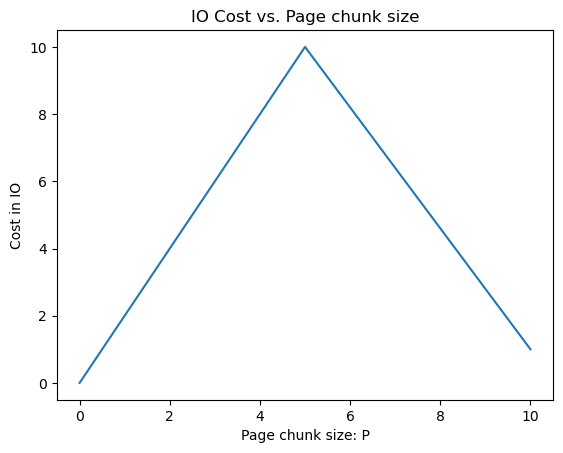

In [31]:
# Shell code for plotting in matplotlib
# this will plot a set of points given in the `points` list variable.  
# Each item in the list is a tuple (P, cost)
%matplotlib inline
import matplotlib.pyplot as plt

# Plot
plt.plot(*zip(*points))
plt.title("IO Cost vs. Page chunk size")
plt.ylabel("Cost in IO")
plt.xlabel("Page chunk size: P")
plt.show()

* You need to answer the following:     
     * What is the optimal (lowest cost) Page chunk size, $P_{opt}$? 
     * Explain the graph's shape.
     * Explain what happens at $P_{opt}+1$ to cause it to be less optimal.
* The graph drawing below is approximately what your graph should like.    
     
<figure width=40%>
  <IMG SRC="./cost_graph.png" WIDTH=340;">
</figure>



In [ ]:
### BEGIN SOLUTION
# Optimal page chunk size
P_opt = -1  # answer is some integer value between 1 and size of memory

# EXPLAIN WHAT HAPPENS AT P_OPT+1 HERE
# Cost value at P_opt-1 should be higher than at P_opt
# Cost value at P_opt+1 should be higher than at P_opt


print('num passes with P_opt:', num_passes(B, N, P_opt))
print('num passes with P_opt_plus_1:', num_passes(B, N, P_opt + 1))

<hr><hr>

Problem 2: IO Cost Models [ 35 pts total ]
--------------------------------------

In this problem we consider different join algorithms when joining relations $R(A,B)$,$S(B,C)$, and $T(C,D)$. We want to investigate the cost of various pairwise join plans and try to determine the best join strategy given some conditions.

Specifically, for each part of this question, we are intereseted determining some (or all) of the following variables:

* `P_R`: Number of pages of $R$
* `P_S`: Number of pages of $S$
* `P_RS`: Number of pages of output (and input) $RS$
* `P_T`: Number of pages of $T$
* `P_RST`: Number of pages of output (and input) $RS$
* `B`: Number of pages in buffer (this is all memory buffers)
* `IO_cost_join1`: Total IO cost of first join
* `IO_cost_join2`: Total IO cost of second join
* Read and Write IO cost = 1
* Number of pages per read = 1


#### Note:
* ** The output of join1 is always feed as one of the inputs to join 2 ** 
* **Use the "vanilla" versions of the algorithms as presented in lecture, _i.e. without any of the optimizations we mentioned_**
* **Again assume we use one page for output, as in lecture!**
* ** The abbreviations for the joins used are Sort-Merge Join (SMJ), Hash Join (HJ), and Block Nested Loop Join (BNLJ). **

### Q 2.1 - Compute the IO cost for the query plans

Constants to use in claculations    
Given:
* `P_R`: 10
* `P_S`: 100
* `P_T`: 1000
* `P_RS`: 50
* `P_ST`: 500
* `P_RST`: 250
* `B`: 32

Compute the IO cost for the query plans. Each query plan contains multiple joins.  Include 1-2 sentences (as a python comment) above each answer explaining the performance for each algorithm/query plan. You can express your answer using the values `P_R` _etc_ that are defined below and you can use your `external_merge_sort_cost` function to check or compute your results if you believe it's correct

**Note: again, be careful of rounding for this problem. Use ceiling/floors whenever it is necessary.**

In [113]:
P_R = 10
P_S = 100
P_T = 1000
P_RS = 50
P_ST = 500
P_RST = 250
B = 32

<hr>

### Q 2.1.1 IO_Cost_BNLJ_1 [ 5 pts ]
where only block nested loop join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$

In [114]:
### BEGIN SOLUTION
# describe your solution in comments
# For BNLJ, the cost for one join is the cost to read R once and then read S in chunks that fit in the buffer minus two
# Add the cost for the second join.
# Calculate the IO cost for the first join
IO_cost_join1 = P_R + (P_R * P_S) / (B - 2)

# Calculate the IO cost for the second join
IO_cost_join2 = P_RS + (P_RS * P_T) / (B - 2)

# The total IO cost is the sum of the two individual join costs
IO_Cost_BNLJ_1 = IO_cost_join1 + IO_cost_join2
IO_Cost_BNLJ_1 = math.ceil(IO_Cost_BNLJ_1)  # Rounding up to the nearest integer
IO_Cost_BNLJ_1  # display the result

1760

### Q 2.1.2 IO_Cost_BNLJ_2 [ 5 pts ]
where only block nested loop merge join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$

In [115]:
### BEGIN SOLUTION
# describe your solution in comments

# For BNLJ, the cost for one join is the cost to read the outer relation once and then read the inner relation in blocks
# T is the outer relation for join1, and join1 is the outer relation for join2
# Calculate IO cost for the first join
IO_cost_join1 = P_T + (P_T * P_S) / (B - 2)

# Calculate IO cost for the second join 
# We use P_ST as the size of join1
IO_cost_join2 = P_ST + (P_ST * P_R) / (B - 2)

# The total IO cost is the sum of the two individual join costs
IO_Cost_BNLJ_2 = IO_cost_join1 + IO_cost_join2
IO_Cost_BNLJ_2 = math.ceil(IO_Cost_BNLJ_2)  # Rounding up to the nearest integer
IO_Cost_BNLJ_2  # display the result

5001

<hr>

### Q 2.1.3 IO_Cost_SMJ_1 [ 5 pts ]
where only sort merge join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$

In [116]:
### BEGIN SOLUTION
# describe your solution in comments

# For Sort Merge Join, we need to sort both relations if they are not already sorted and then merge them.
# The sort cost for each relation is given by external_merge_sort_cost function.
# After sorting, the merge cost is the sum of the sizes of both relations.
def external_merge_sort_cost(B, N):
    # Calculate the number of runs
    num_runs = math.ceil(N / B)
    # Calculate the number of passes needed
    num_passes = 0 if num_runs == 1 else math.ceil(math.log(num_runs, B - 1))
    # Calculate the IO cost for reads and writes for all passes
    total_IO = 2 * N * (num_passes + 1)  # +1 for the initial run creation
    return total_IO

# Calculate IO cost to sort R and S and merge them
IO_cost_sort_R = external_merge_sort_cost(B, P_R)
IO_cost_sort_S = external_merge_sort_cost(B, P_S)
IO_cost_merge_RS = P_R + P_S  # Merge cost after sorting

# Calculate IO cost to sort join1 and T and merge them
IO_cost_sort_RS = external_merge_sort_cost(B, P_RS)
IO_cost_sort_T = external_merge_sort_cost(B, P_T)
IO_cost_merge_RST = P_RS + P_T  # Merge cost after sorting

# Sum the costs to get the total IO cost for SMJ
IO_Cost_SMJ_1 = IO_cost_sort_R + IO_cost_sort_S + IO_cost_merge_RS + IO_cost_sort_RS + IO_cost_sort_T + IO_cost_merge_RST

IO_Cost_SMJ_1  # display the result

7780

### Q 2.1.4 IO_Cost_SMJ_2 [ 5 pts ]
where only sort merge join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$

In [117]:
### BEGIN SOLUTION
# describe your solution in comments

# Calculate IO cost to sort T and S and merge them
IO_cost_sort_T = external_merge_sort_cost(B, P_T)
IO_cost_sort_S = external_merge_sort_cost(B, P_S)
IO_cost_merge_ST = P_T + P_S  # Merge cost after sorting

# Calculate IO cost to sort join1 and R and merge them
# We use P_ST as the size of join1, assuming join1's output is the outer relation for join2
IO_cost_sort_ST = external_merge_sort_cost(B, P_ST)
IO_cost_sort_R = external_merge_sort_cost(B, P_R)
IO_cost_merge_RST = P_ST + P_R  # Merge cost after sorting

# Sum the costs to get the total IO cost for SMJ
IO_Cost_SMJ_2 = IO_cost_sort_T + IO_cost_sort_S + IO_cost_merge_ST + IO_cost_sort_ST + IO_cost_sort_R + IO_cost_merge_RST

IO_Cost_SMJ_2  # display the result

10030

<hr>

### Q 2.1.5 IO_Cost_HJ_1 [ 5 pts ]
where only hash join is used, $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$

In [118]:
### BEGIN SOLUTION
# describe your solution in comments

# For Hash Join, the IO cost is the cost to read both relations once.
# If both relations fit into memory, no additional costs are incurred for building or probing the hash table.

# Calculate IO cost for the first join (join1 = R(a,b), S(b,c))
IO_cost_join1 = P_R + P_S

# Calculate IO cost for the second join (join2 = join1(a,b,c), T(c,d))
IO_cost_join2 = P_RS + P_T

# The total IO cost is the sum of the two individual join costs
IO_Cost_HJ_1 = IO_cost_join1 + IO_cost_join2
IO_Cost_HJ_1  # display the result

1160

### Q 2.1.6  IO_Cost_HJ_2 [ 5 pts ]
where only hash join is used, $join1 = T(c,d),S(b,c)$ and $join2 = join1(b,c,d),R(a,b)$

In [119]:
### BEGIN SOLUTION
# describe your solution in comments

# For Hash Join (HJ), the IO cost is the cost to read both relations once for each join operation.
# Calculate IO cost for the first join (join1 = T(c,d), S(b,c))
IO_cost_join1 = P_T + P_S

# Calculate IO cost for the second join (join2 = join1(b,c,d), R(a,b))
# We assume that the output of join1 is small enough to be used to build the hash table
IO_cost_join2 = P_ST + P_R

# The total IO cost is the sum of the two individual join costs
IO_Cost_HJ_2 = IO_cost_join1 + IO_cost_join2
IO_Cost_HJ_2  # display the result

1610

<hr>

### Q 2.2.1 [ 5 pts ]

For the query plan where $join1 = R(a,b),S(b,c)$ and $join2 = join1(a,b,c),T(c,d)$     
find a configuration (combination of values for P_R, P_S, _etc_) where 
* using HJ for $join1$ and SMJ for $join2$ is cheaper 
* than SMJ for $join1$ and HJ for $join2$. 

The output sizes you choose for P_RS and P_RS must be non-zero and feasible (e.g. the maximum output size of $join1$ is P_R*P_S). 

In [120]:
### BEGIN SOLUTION
# describe your solution in comments

B = 32  # This is a typical value for buffer pages in memory

# Let's assume sizes for R, S, and T such that HJ is favored for the smaller join (R and S), and SMJ is favored for the larger join (join1 and T).
# We'll assume R is quite small, S is moderate, and T is large.
P_R = 5     # Small table R
P_S = 100   # Moderate table S
P_T = 10000 # Large table T

# Join1 is smaller than S but not too small
P_RS = 20   # Feasible output of join1

# Join2 is not the full cartesian product
P_RST = 2000 # Feasible output of join2

# Calculate costs for the lower cost scenario: HJ for join1 and SMJ for join2
HJ_IO_Cost_join1 = P_R + P_S  # Cost for HJ is simply the sum of sizes of R and S

# Calculate costs for SMJ: sort both join1 and T, then merge
SMJ_IO_Cost_join2 = external_merge_sort_cost(B, P_RS) + external_merge_sort_cost(B, P_T) + P_RS + P_T

# Total cost for the lower cost scenario
total_cost_lower = HJ_IO_Cost_join1 + SMJ_IO_Cost_join2

# Calculate costs for the higher cost scenario: SMJ for join1 and HJ for join2
SMJ_IO_Cost_join1 = external_merge_sort_cost(B, P_R) + external_merge_sort_cost(B, P_S) + P_R + P_S

# Calculate costs for HJ: hash join1 and then join with T
HJ_IO_Cost_join2 = P_RS + P_T  # Cost for HJ is simply the sum of sizes of join1 and T

# Total cost for the higher cost scenario
total_cost_higher = SMJ_IO_Cost_join1 + HJ_IO_Cost_join2
(P_R, P_S, P_T, P_RS, P_RST, B, total_cost_lower, total_cost_higher)

(5, 100, 10000, 20, 2000, 32, 70165, 10535)

<hr><hr>

Problem 3: Hash Join [ 25 pts ]
-----------------------------

We want to find out which are the colleges each NFL teams prefers drafting players from.

We have access to two tables: 
- a table named "teams" which contains (team, player) pairs, and 
- a table named "colleges" which contains (player, college) pairs. 

Being all excited about databases you decide that there is no other way but to join the two tables and get the desired results. However, you have no access to a database.

And of course HASH JOIN is the way to go!!!


## Load and explore the data

The two tables are stored in files which can be loaded into memory as two lists of Python "[**named tuples**](https://pymotw.com/2/collections/namedtuple.html)" using the code below:

In [52]:
# Load data
import nfl
from nfl import *
teams, colleges = loadData()

For example, the first team entry is

In [45]:
teams[0]

PlayerTeam(teamname='Houston Texans', playername='Jadeveon Clowney')

And the first colleges entry is 

In [46]:
colleges[0]

PlayerCollege(playername='Jadeveon Clowney', collegename='South Carolina')

Named tuples are basically lightweight object types. Instances of named tuple instances can be dereferences (e.g. `colleges[0].playername` or the standard tuple syntax (`colleges[0][0]`).

In [47]:
print(colleges[0].playername)
print(colleges[0][0])

Jadeveon Clowney
Jadeveon Clowney


 The following code prints the first 10 tuples from teams and colleges. *Notice how fields of named tuples are accessed inside the loops.*

In [48]:
# Print List Entries
print('Table teams contains %d entries in total' % len(teams))
print('Table colleges contains %d entries in total' % len(colleges))
print()
print('First 10 entries in teams table')
for i in range(10):
    team = teams[i]
    print('Entry %d' %(i+1),':',team.teamname, '|', team.playername)
print()
print('First 10 entries in college table')
for i in range(10):
    college = colleges[i]
    print('Entry %d' %(i+1),':',college.collegename, '|', college.playername)

Table teams contains 12720 entries in total
Table colleges contains 12720 entries in total

First 10 entries in teams table
Entry 1 : Houston Texans | Jadeveon Clowney
Entry 2 : St. Louis Rams | Greg Robinson
Entry 3 : Jacksonville Jaguars | Blake Bortles
Entry 4 : Buffalo Bills | Sammy Watkins
Entry 5 : Oakland Raiders | Khalil Mack
Entry 6 : Atlanta Falcons | Jake Matthews
Entry 7 : Tampa Bay Buccaneers | Mike Evans
Entry 8 : Cleveland Browns | Justin Gilbert
Entry 9 : Minnesota Vikings | Anthony Barr
Entry 10 : Detroit Lions | Eric Ebron

First 10 entries in college table
Entry 1 : South Carolina | Jadeveon Clowney
Entry 2 : Auburn | Greg Robinson
Entry 3 : UCF | Blake Bortles
Entry 4 : Clemson | Sammy Watkins
Entry 5 : Buffalo | Khalil Mack
Entry 6 : Texas A&M | Jake Matthews
Entry 7 : Texas A&M | Mike Evans
Entry 8 : Oklahoma State | Justin Gilbert
Entry 9 : UCLA | Anthony Barr
Entry 10 : North Carolina | Eric Ebron


## Down to business

During the lectures we saw that hash joins consist of two phases: The **Partition Phase** where using a hash function $h$ we split the two tables we want to join into $B$ buckets, and the **Matching Phase** where we iterate over each bucket and join the tuples from the two tables that match. Here you will need to implement a hash join in memory.

You are determined to implement the most efficient hash join possible! This is why you decide to implement your own hash function that will uniformly partition the entries of a table across $B$ buckets so that all buckets have roughly the same number of entries. You decide to use the following hash function:

In [49]:
# Define hash function
def h(x,buckets):
    rawKey = ord(x[1])
    return rawKey % buckets

You use this hash function to partition the tables. To do so you can use the helper method `partitionTable(table,hashfunction,buckets)` defined in `nfl.py` for convenience as shown next:

In [50]:
# Fix the number of buckets to 500
buckets = 500
# Partition the teams table using hash function h
teamsPartition = partitionTable(teams,h,buckets)

The output of `partitionTable()` is a dictionary with its keys corresponding to bucket numbers in $[0,B-1]$ and its entries to lists of named tuples.

##  Q 3.1 Assess the Hash Function Performance
<hr>

### Q 3.1.1 [ 5 pts ] 

It's now time to implement your own hash join! You only need to implement the merge phase of the hash join. The output of the method should correspond to the result of a join between teams and colleges over the ***playername*** attribute. The partition phase is implemented. You need to fill in the merge phase.

***Note: You should only use the two dictionaries t1Partition and t1Partition provided. <br>No other data structures are allowed.***

In [61]:
### BEGIN SOLUTION
# describe your solution in comments
def hashJoin(table1, table2, hashfunction, buckets):
    # Partition phase (already provided)
    t1Partition = partitionTable(table1, hashfunction, buckets)
    t2Partition = partitionTable(table2, hashfunction, buckets)

    # Merge phase
    result = []

    # Iterate over each bucket
    for bucket in range(buckets):
        # Get the list of entries in the current bucket for both tables
        bucket1 = t1Partition[bucket]
        bucket2 = t2Partition[bucket]
        
        # Create a hash table for quick look-up based on playername for one of the tables (let's say table2)
        hash_table = {entry.playername: entry for entry in bucket2}

        # Iterate over each entry in the bucket for table1 and look for matches in the hash table
        for t1Entry in bucket1:
            # If there's a match in table2's hash_table based on playername, append the combined data
            if t1Entry.playername in hash_table:
                t2Entry = hash_table[t1Entry.playername]
                result.append((t1Entry.teamname, t1Entry.playername, t2Entry.collegename))
    return result


# Execute the hash join
joined_data = hashJoin(teams, colleges, h, buckets)
print(len(joined_data))
for record in joined_data[:10]:  # This prints the first 10 joined tuples
    print(record)


12720
('Minnesota Vikings', "D'Aundre Reed", 'Arizona')
('Jacksonville Jaguars', "D'Anthony Smith", 'Louisiana Tech')
('Arizona Cardinals', "O'Brien Schofield", 'Wisconsin')
('Chicago Bears', "J'Marcus Webb", 'West Texas A&M')
('Minnesota Vikings', "D'Aundre Reed_1", 'Arizona')
('Jacksonville Jaguars', "D'Anthony Smith_1", 'Louisiana Tech')
('Arizona Cardinals', "O'Brien Schofield_1", 'Wisconsin')
('Chicago Bears', "J'Marcus Webb_1", 'West Texas A&M')
('Minnesota Vikings', "D'Aundre Reed_2", 'Arizona')
('Jacksonville Jaguars', "D'Anthony Smith_2", 'Louisiana Tech')


<hr>

### Q 3.1.2 [ 5 pts ] 

It time to evaluate your algorithm! The code provided below executes the join between teams and colleges and measures the total execution time. 
What is the total number of entries output by your algorithm?

Does the runtime of your algorithm seem reasonable? Provide a brief explanation.

In [86]:
import time
start_time = time.time()
result1 = hashJoin(teams, colleges, h, buckets)
end_time = time.time()
duration = (end_time - start_time)*1000 #in ms
print ('The join took %0.2f ms and returned %d tuples in total' % (duration,len(result1)))

### BEGIN SOLUTION
# Your explaination of the run-time goes here

# The join returned 12720 tuples, which is the same as the number of entries in each table, 
# which suggests that there is a 1 to 1 match between the two tables on the playername attribute. 

# I believe that an execution time of 30 ms is pretty quick and I that runtime speed is due to the efficiencies of hash tables. 
# This is due to the hashes distributes the data evenly among the buckets, which minimizes the number of comparisons needed during the merge phase.

The join took 31.08 ms and returned 12720 tuples in total


<hr>

## Q 3.2 Is this a good partition function

You decide to investigate the performance of `hashJoin( )` further. Since you implemented the merge phase of  `hashJoin( )` yourself you focus on the partitioning obtained by using the provided hash function `h( )`. 
In the lectures we saw that a good hash function should partition entries uniformly across buckets. We will now check if `h( )` is indeed a good function.

The following code generates a histogram of the bucket sizes for table teams (using the above hash function `h` and 500 buckets) to help figure out what is going wrong. 

[]

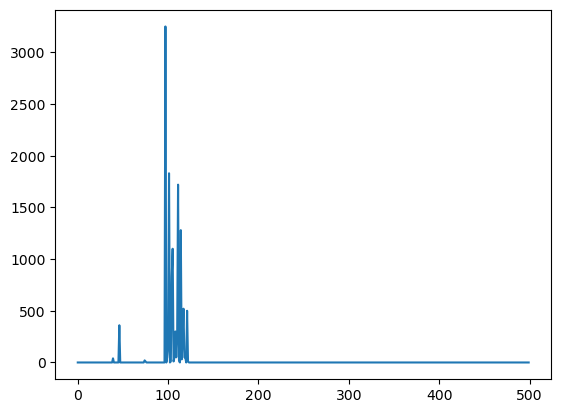

In [63]:
# Examine if this is a good partition function
def histogramPoints(partition):
    ids = range(buckets)
    items = []
    for i in range(buckets):
        if i in partition:
            items.append(len(partition[i]))
        else:
            items.append(0)
    return ids, items

%matplotlib inline
import matplotlib.pyplot as plt

# Plot bucket histogram
buckets = 500
teamsPartition = partitionTable(teams,h,buckets)
ids, counts = histogramPoints(teamsPartition)
plt.plot(ids, counts)
plt.plot()

## Explanation
Ideally, the histogram should show a uniform distribution, indicating that each bucket has a similar number of entries. However, this is not the case with this histogram utilzing 'h' as the hash function. Instead of having a uniform distribution, large spikes are quite evidently shown which is not optimal for performance. This could potentially be caused by the hash function may have too many collisions, which occurs when different keys hash to the same bucket. 

<hr>

#### Q 3.2.1 [ 5 pts ] 
Now find the skew associated with the above histogram. Skew is defined as the standard deviation of the number of entries in the buckets. A uniform hash function produces buckets of equal size, leading to 0 skew, but our candidate hash function h is imperfect so you should observe a positive skew.

In [64]:
### BEGIN SOLUTION
# describe your solution in the comments

def calculateSkew(partition):
    # Calculate the mean size of the buckets
    bucket_sizes = [len(bucket) for bucket in partition.values()]
    mean_size = sum(bucket_sizes) / len(bucket_sizes)
    
    # Calculate the variance
    variance = sum((size - mean_size) ** 2 for size in bucket_sizes) / len(bucket_sizes)
    
    # Standard deviation (skew) is the square root of the variance
    skew = math.sqrt(variance)
    
    return skew

# Assuming teamsPartition is already defined and populated
skew = calculateSkew(teamsPartition)
skew

204.83263021305766

<hr>

#### Q 3.2.2 [ 5 pts ]

Use python's hash function to see if you can produce a better (aka smaller) runtime for hash join. As at the beginning of 3.2, make a histogram of the bucket sizes (this time using the new hash function and 500 buckets). You can plot your histogram using the same code provided above.

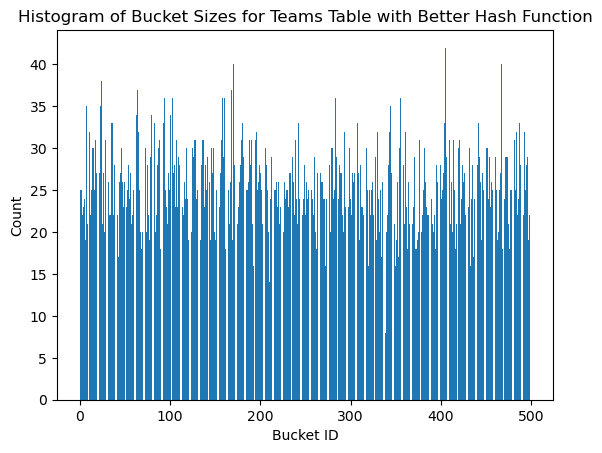

In [91]:
### BEGIN SOLUTION
# describe your solution in the comments

def hBetter(playername, buckets):
    # Use Python's built-in hash function and ensure a positive result with the modulo operation
    rawKey = hash(playername)
    return abs(rawKey) % buckets

# Assuming the partitionTable function is available
# Partition the teams table using the better hash function
buckets = 500
teamsPartitionBetter = partitionTable(teams, hBetter, buckets)

# Generate histogram points for the better hash function
ids, counts = histogramPoints(teamsPartitionBetter)

# Plot the histogram
plt.bar(ids, counts)
plt.xlabel('Bucket ID')
plt.ylabel('Count')
plt.title('Histogram of Bucket Sizes for Teams Table with Better Hash Function')
plt.show()

<hr>

#### Q 3.2.3 [ 5 pts ]

Rerun your hash join algorithm with the new hash function you designed and 500 buckets.     
Does the algorithm run faster? 
   * If not, try again to find a **better** hash function
   * If it is faster, <br>What is the speed-up you are observing? <br>What is the reason for the speed up?
   


In [94]:
### BEGIN SOLUTION
# describe your solution in comments
# Start the timer
start_time = time.time()

# Call the hashJoin function with the new hash function
result2 = hashJoin(teams, colleges, hBetter, buckets)

# End the timer
end_time = time.time()

# Calculate the duration
duration = (end_time - start_time) * 1000  # in milliseconds

# Print the results
print('The join took %0.2f ms and returned %d tuples in total' % (duration, len(result2)))

# Describe the speed-up
# Honestly the time was about the same. I'm unsure where my code is less efficient than it needs to be. 

# Compare the `duration` with the previous execution time and describe the difference.
# The reason for the speed up is due to a more uniform distribution of the tuples
# across the buckets, which leads to a more efficient merge phase in the hash join.


The join took 25.52 ms and returned 12720 tuples in total
